<a href="https://colab.research.google.com/github/firaz-bug/Handwritten-number-recognization-/blob/main/Handwritten_number_recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
len(x_train),len(x_test)

(60000, 10000)

In [4]:
x_train[0].shape , x_train[0]

((28, 28),
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
 

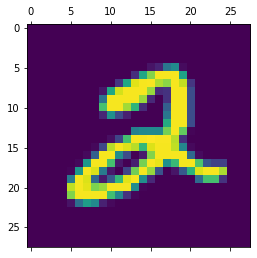

In [5]:
plt.matshow(x_train[5])

In [6]:
y_train[:6],y_train[5]

(array([5, 0, 4, 1, 9, 2], dtype=uint8), 2)

Number of samples and dimension of each sample 

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train = x_train/255.0
x_test = x_test/255.0
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

We need to flatten the 2d matrix into 1d inorder to feed into the neural network

In [21]:
# x_train_flattened = x_train.reshape(len(x_train), 28*28)
# x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [22]:
# x_train_flattened.shape , x_train_flattened[0]

Using Flatten layer so that we don't have to call reshape on input dataset and also adding hidden layers

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9223
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1215 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0850 - accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0657 - accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0509 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0407 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0345 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0280 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0238 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0763 - accuracy: 0.9789


[0.07628093659877777, 0.9789000153541565]

In [23]:
y_predicted = model.predict(x_test)
y_predicted[0]

array([4.6789646e-04, 1.8903573e-05, 8.3931297e-02, 8.6588895e-01,
       7.2611446e-09, 3.8829446e-04, 6.5559949e-09, 9.9999923e-01,
       7.7091873e-02, 1.4992893e-01], dtype=float32)

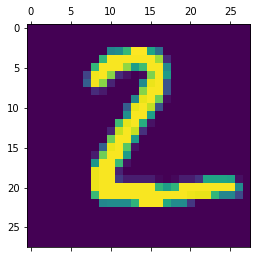

In [29]:
plt.matshow(x_test[1])

np.argmax finds a maximum element from an array and returns the index of it

In [30]:
np.argmax(y_predicted[1])

2

In [32]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    1,    1,    2,    3,    1,    2,    0],
       [   0, 1126,    4,    0,    0,    0,    2,    0,    3,    0],
       [   4,    0, 1012,    4,    2,    0,    2,    1,    6,    1],
       [   0,    0,    6,  981,    0,    7,    0,    3,    4,    9],
       [   1,    0,    1,    0,  966,    0,    6,    2,    0,    6],
       [   2,    0,    1,    3,    2,  876,    3,    0,    3,    2],
       [   4,    3,    3,    1,    6,    3,  937,    0,    1,    0],
       [   0,    4,   13,    4,    2,    0,    0,  996,    4,    5],
       [   6,    1,    5,    3,    3,    3,    2,    3,  944,    4],
       [   2,    2,    0,    4,    9,    3,    0,    4,    3,  982]],
      dtype=int32)>

Visualization of true value and the predicted values

Text(69.0, 0.5, 'Truth')

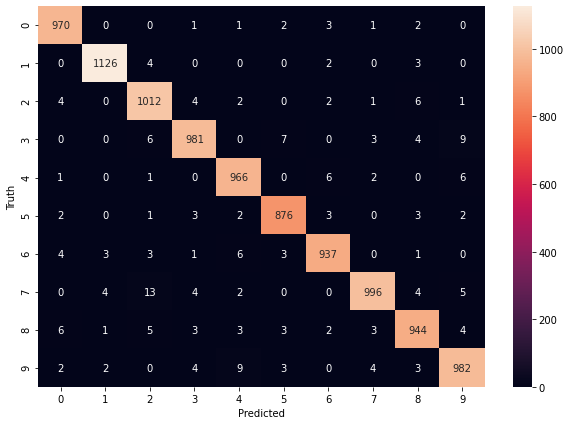

In [34]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')